In [7]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
#fungsi load data
def load_data(file):
    return np.loadtxt(file)

In [9]:
#fungsi euclidean sebagai method untuk mencari jarak
def euclidean(a,b):
    return np.linalg.norm(a-b)

In [21]:
#fungsi utama kmeans dengan parameter jumlah cluster, centroid awal, dataset, jumlah instance, dan jumlah fitur
def kmeans(k,centroids,dataset, n_instances, n_features):
    #array history_centroid untuk menyimpan centroid pada setiap iterasi
    history_centroids = []
    #menggunakan euclidean untuk menghitung distance
    distance = euclidean
    #menyimpan centroid awal ke array history_centroids
    history_centroids.append(centroids)
    #membuat suatu array yang dapat menyimpan centroid lama 
    old_centroids = np.zeros(centroids.shape)
    #array belongs_to adalah array yang menyimpan hasil cluster setiap instances
    belongs_to = np.zeros((n_instances,1))
    #norm merupakan selisih antara centroid sekarang dengan centroid lama
    norm = distance(centroids,old_centroids)
    iteration = 0
    #looping sampai norm = 0 (konvergen)
    while norm > 0:
        iteration += 1
        #menyimpan centroid ke variabel centroid lama
        old_centroids = centroids
        #hitung setiap instance di dataset
        for idx_instance, instance in enumerate(dataset):
            #membuat array dengan index = k
            dist_vec = np.zeros((k,1))
            #looping untuk setiap index
            for idx_centroid, centroid in enumerate(centroids):
                #menyimpan jarak antara centroid dan titik setiap instance
                dist_vec[idx_centroid] = distance(centroid,instance)
            #menyimpan data cluster sesuai dengan instance
            belongs_to[idx_instance,0] = np.argmin(dist_vec)
        #temp_centroid adalah array pembantu untuk mengupdate centroid baru
        temp_centroids = np.zeros((k,n_features))
        for idx in range(len(centroids)):
            #mencari instance yang menjadi bagian dari cluster i
            instance_close = [i for i in range(len(belongs_to)) if belongs_to[i] == idx]
            #centroid di update dengan mencari rata-rata dari jarak centroid ke setiap titik instances di cluster tersebut
            centroid = np.mean(dataset[instance_close],axis=0)
            #menyimpan setiap centroid yang baru di update
            temp_centroids[idx, :] = centroid
        centroids = temp_centroids
        #menambahkan centroid yang baru di update ke array history_centroids
        history_centroids.append(temp_centroids)
        #mencari nilai norm terbaru
        norm = distance(centroids,old_centroids)
    print("jumlah iterasi: "+str(iteration))
    return centroids, history_centroids, belongs_to

<function matplotlib.pyplot.show>

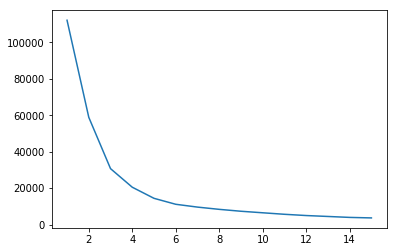

In [13]:
#merupakan elbow method dengan menggunakan lib sklearn
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init=10, random_state=0).fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,16), wcss)
plt.show

In [29]:
#load dataset
dataset = load_data('TrainsetTugas2.txt')
#mencari jumlah instance dan fitur
n_instances, n_features = dataset.shape
#merandom centroids awal dari titik yang ada
centroids = dataset[np.random.randint(0,n_instances-1, size=6)]
print("Centroid awal : ")
print(centroids)
final_centroids, history_of_centroids, belongs_to_centroid = kmeans(6,centroids,dataset,n_instances, n_features)
#merubah bentuk dimensi array 
arr_cluster = np.array(belongs_to_centroid)
arr_cluster.resize(688,)
arr_cluster

Centroid awal : 
[[32.5  24.7 ]
 [16.55  2.15]
 [29.15 20.55]
 [21.9  23.65]
 [16.4   8.7 ]
 [ 9.95 22.65]]
jumlah iterasi: 10


array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

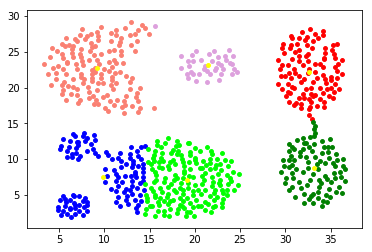

In [30]:
#plot data sesuai cluster
plt.scatter(dataset[arr_cluster==0,0], dataset[arr_cluster==0,1], s=15, c='red', label='Cluster 1')
plt.scatter(dataset[arr_cluster==1,0], dataset[arr_cluster==1,1], s=15, c='blue', label='Cluster 2')
plt.scatter(dataset[arr_cluster==2,0], dataset[arr_cluster==2,1], s=15, c='green', label='Cluster 3')
plt.scatter(dataset[arr_cluster==3,0], dataset[arr_cluster==3,1], s=15, c='plum', label='Cluster 4')
plt.scatter(dataset[arr_cluster==4,0], dataset[arr_cluster==4,1], s=15, c='lime', label='Cluster 5')
plt.scatter(dataset[arr_cluster==5,0], dataset[arr_cluster==5,1], s=15, c='salmon', label='Cluster 6')
plt.scatter(final_centroids[:,0], final_centroids[:,1], s=15, c='yellow',label='Centroids')
plt.show()